# Postprocessing with pyGOLD
___
This notebook demonstrates how to use the pyGOLD postprocessing functions. These functions are provided for use with benchmark problems defined in only one dimension. For problems defined in multiple dimensions, it is recommended to use the COCOPP postprocessing integration. However, these postprocessing functions will work on multi-dimensional data.

In [1]:
import pygold
import pygold.problems.standard_problems as bp
import scipy.optimize as opt

# To display the results - not required for the tests
import glob
import os
import matplotlib.pyplot as plt
from IPython.display import Markdown

## Select Problems, Solvers, and Generate Benchmark Data
---

We'll use all 2D standard problems as our benchmark problems and test the algorithms shgo and dual annealing from scipy.optimize. `run_solvers` will run the solvers on the problems and save the results in the output_data/ folder in the COCO format.

In [2]:
# Select problems
problems = bp.__2D__

# Select solvers
solvers = [opt.shgo, opt.dual_annealing]

# Run solvers on the selected problems
pygold.run_solvers(solvers, problems, n_iters=5, verbose=True)

Running shgo on Bukin6 in 2D, iteration 1/5
Running shgo on Bukin6 in 2D, iteration 2/5
Running shgo on Bukin6 in 2D, iteration 3/5
Running shgo on Bukin6 in 2D, iteration 4/5
Running shgo on Bukin6 in 2D, iteration 5/5
Running dual_annealing on Bukin6 in 2D, iteration 1/5
Running dual_annealing on Bukin6 in 2D, iteration 2/5
Running dual_annealing on Bukin6 in 2D, iteration 3/5
Running dual_annealing on Bukin6 in 2D, iteration 4/5
Running dual_annealing on Bukin6 in 2D, iteration 5/5
Running shgo on CrossInTray in 2D, iteration 1/5
Running shgo on CrossInTray in 2D, iteration 2/5
Running shgo on CrossInTray in 2D, iteration 3/5
Running shgo on CrossInTray in 2D, iteration 4/5
Running shgo on CrossInTray in 2D, iteration 5/5
Running dual_annealing on CrossInTray in 2D, iteration 1/5
Running dual_annealing on CrossInTray in 2D, iteration 2/5
Running dual_annealing on CrossInTray in 2D, iteration 3/5
Running dual_annealing on CrossInTray in 2D, iteration 4/5
Running dual_annealing on Cro

/Users/bselvage/Library/CloudStorage/OneDrive-NREL/VSCode/global_opt_bench/pygold/problems/standard_problems.py:622: RuntimeWarning: overflow encountered in exp
  term2 = xp.exp(abs_fn(1 - (xp.sqrt(x1**2 + x2**2) / np.pi)))
/Users/bselvage/anaconda3/envs/pyGOLD/lib/python3.13/site-packages/scipy/optimize/_numdiff.py:596: RuntimeWarning: invalid value encountered in subtract
  df = fun(x1) - f0


Running dual_annealing on HolderTable in 2D, iteration 4/5
Running dual_annealing on HolderTable in 2D, iteration 5/5
Running shgo on Langermann in 2D, iteration 1/5
Running shgo on Langermann in 2D, iteration 2/5
Running shgo on Langermann in 2D, iteration 3/5
Running shgo on Langermann in 2D, iteration 4/5
Running shgo on Langermann in 2D, iteration 5/5
Running dual_annealing on Langermann in 2D, iteration 1/5
Running dual_annealing on Langermann in 2D, iteration 2/5
Running dual_annealing on Langermann in 2D, iteration 3/5
Running dual_annealing on Langermann in 2D, iteration 4/5
Running dual_annealing on Langermann in 2D, iteration 5/5
Running shgo on Levy13 in 2D, iteration 1/5
Running shgo on Levy13 in 2D, iteration 2/5
Running shgo on Levy13 in 2D, iteration 3/5
Running shgo on Levy13 in 2D, iteration 4/5
Running shgo on Levy13 in 2D, iteration 5/5
Running dual_annealing on Levy13 in 2D, iteration 1/5
Running dual_annealing on Levy13 in 2D, iteration 2/5
Running dual_annealing o

## Postprocess Data
---
To postprocess the data, call the postprocessing function with the location the data is saved. Note that the data must be saved in the COCO format.

In [3]:
x = pygold.postprocessing.postprocess_data(["output_data/dual_annealing", "output_data/shgo"])

## Display the Results
---
Calling the postprocessing function saves the plots to the folder ppfigures/. Lets display them. We will also show the summary dataframe. 

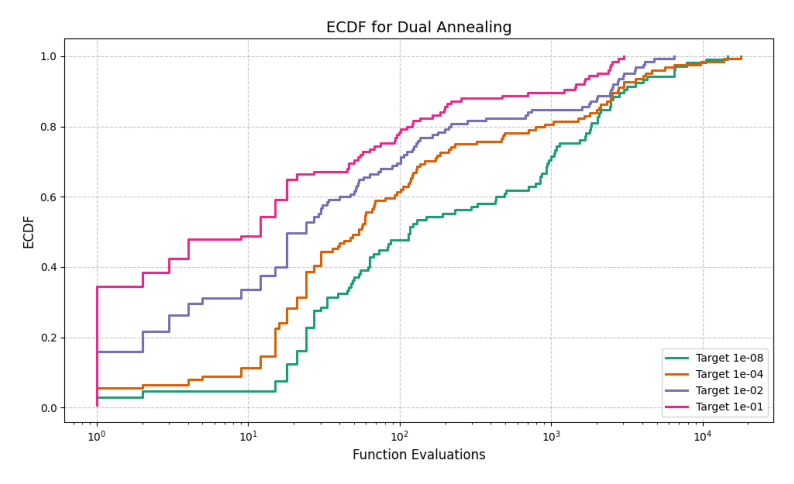

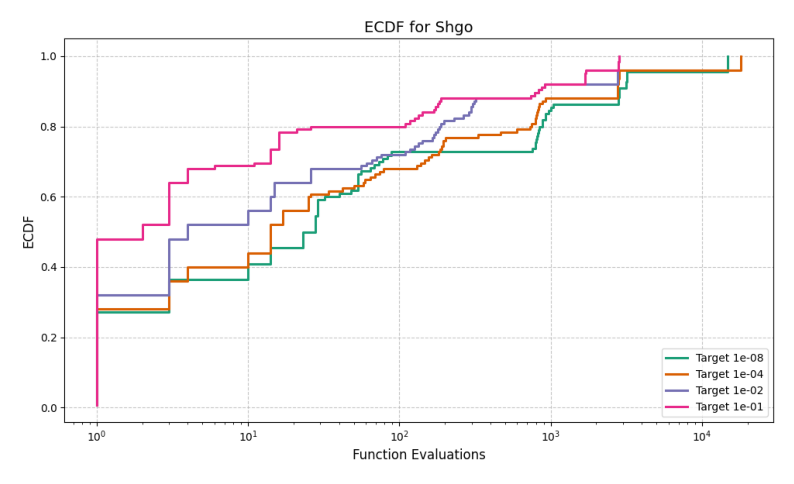

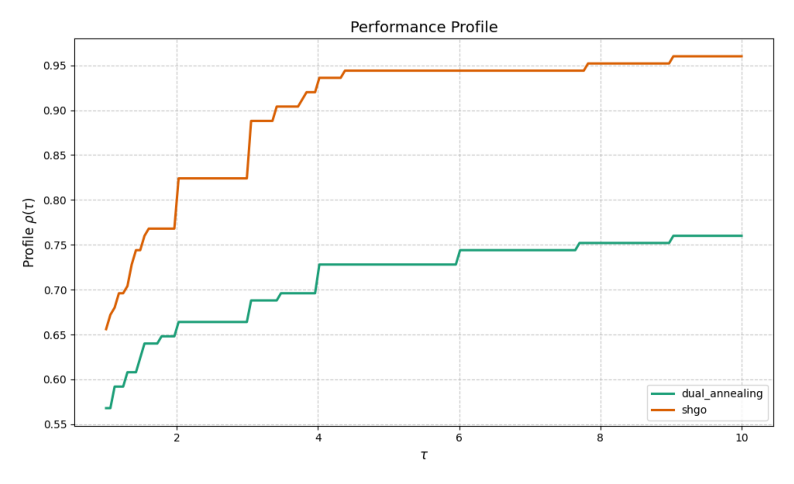

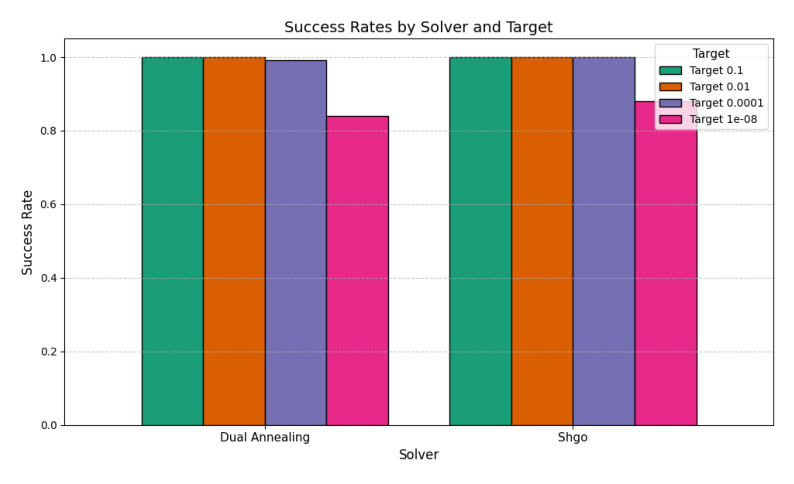

## Average fevals per problem among successful runs:

,problem,solver,n_dims,target_0.1,target_0.01,target_0.0001,target_1e-08
0,Beale,dual_annealing,2,1.0,1.2,3.4,200.6
1,Beale,shgo,2,1.0,1.0,1.0,29.0
2,Bird,dual_annealing,2,1.0,2.8,13.0,1104.6
3,Bird,shgo,2,1.0,4.0,4.0,966.0
4,Bohachevsky1,dual_annealing,2,12.2,16.4,25.2,962.8
5,Bohachevsky1,shgo,2,1.0,1.0,1.0,1.0
6,Bohachevsky2,dual_annealing,2,12.2,16.4,25.8,1356.0
7,Bohachevsky2,shgo,2,1.0,1.0,1.0,1.0
8,Bohachevsky3,dual_annealing,2,12.2,15.2,117.4,311.6
9,Bohachevsky3,shgo,2,1.0,1.0,1.0,1.0


In [4]:
# Path to the figures
figure_path = "ppfigures/"

# Get all figure files in the directory
figure_files = glob.glob(os.path.join(figure_path, "*.png"))
figure_files.sort()

# Display each figure
for fig_file in figure_files:
    plt.figure(figsize=(10, 8))
    img = plt.imread(fig_file)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Display dataframe
display(Markdown("## Average fevals per problem among successful runs:"))
display(x['data'])